In [1]:
import pandas as pd
import random
temp = pd.DataFrame()
temp['xyz'] = random.choices(['x','y','z'],k=100)
temp['target'] = random.choices([0,1],k=100)
temp['cont'] = random.choices(range(100),k=100)

In [2]:
temp.head()

,xyz,target,cont
0,z,1,20
1,y,0,34
2,y,0,61
3,x,1,67
4,z,1,61


<AxesSubplot:ylabel='target'>

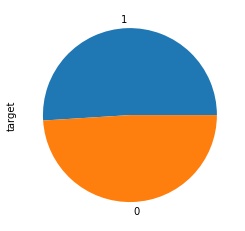

In [3]:
(temp['target'].value_counts(1)*100).plot(kind='pie')

<AxesSubplot:>

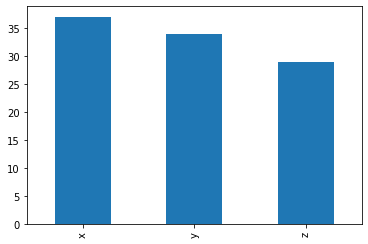

In [4]:
temp.xyz.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='xyz'>

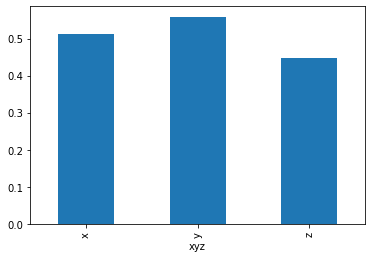

In [5]:
# of 1 /total # records
temp.groupby('xyz')['target'].mean().plot(kind='bar')

In [6]:
temp.groupby('xyz')['target'].value_counts().unstack()

target,0,1
xyz,,
x,18,19
y,15,19
z,16,13


<AxesSubplot:xlabel='xyz'>

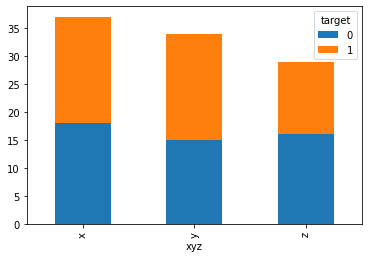

In [7]:
temp.groupby('xyz')['target'].value_counts().unstack().plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='xyz'>

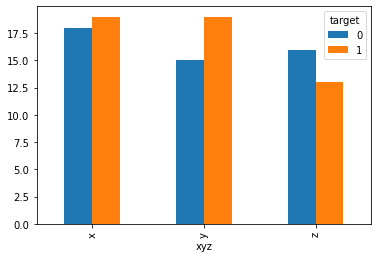

In [8]:
temp.groupby('xyz')['target'].value_counts().unstack().plot(kind='bar')

In [9]:
pd.cut(temp.cont,3).value_counts()

(-0.099, 33.0]    39
(33.0, 66.0]      36
(66.0, 99.0]      25
Name: cont, dtype: int64

In [10]:
temp['cont_bin'] = pd.cut(temp.cont,3)
temp['cont_bin']

0     (-0.099, 33.0]
1       (33.0, 66.0]
2       (33.0, 66.0]
3       (66.0, 99.0]
4       (33.0, 66.0]
           ...      
95    (-0.099, 33.0]
96    (-0.099, 33.0]
97      (33.0, 66.0]
98      (66.0, 99.0]
99      (33.0, 66.0]
Name: cont_bin, Length: 100, dtype: category
Categories (3, interval[float64]): [(-0.099, 33.0] < (33.0, 66.0] < (66.0, 99.0]]

<AxesSubplot:xlabel='cont_bin'>

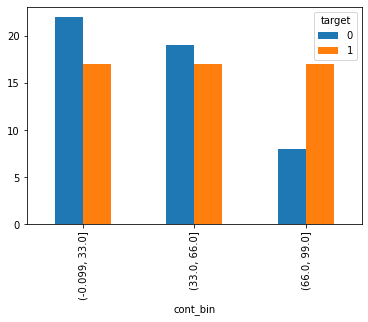

In [11]:
temp.groupby('cont_bin')['target'].value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='xyz'>

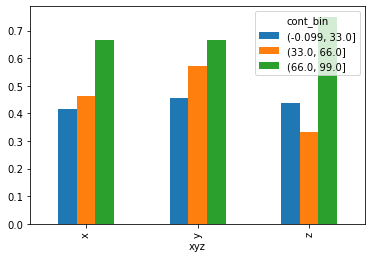

In [12]:
temp.groupby(['xyz','cont_bin'])['target'].mean().unstack().plot(kind='bar')

<AxesSubplot:xlabel='xyz'>

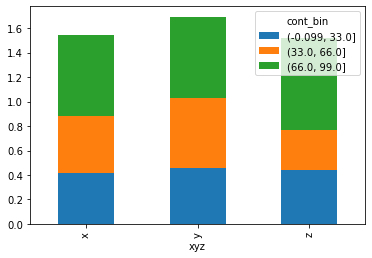

In [13]:
temp.groupby(['xyz','cont_bin'])['target'].mean().unstack().plot(kind='bar',stacked=True)

In [14]:
res={}
for col in ['xyz','cont_bin']:
    tempx = temp.groupby(col)['target'].mean()
    res[col] = max(tempx) - min(tempx)

pd.DataFrame(res.items())

,0,1
0,xyz,0.110548
1,cont_bin,0.244103


In [15]:
res

{'xyz': 0.1105476673427992, 'cont_bin': 0.24410256410256415}

C:\Users\a2z\anaconda3\envs\baseml\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<AxesSubplot:ylabel='Density'>

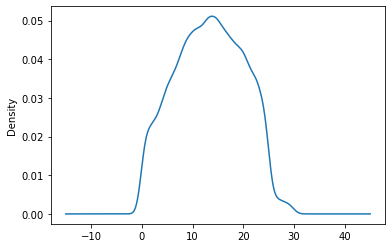

In [16]:
##
import pandas as pd
loan = pd.read_csv("loan.csv", sep=",")
loan['dti'].plot(kind='kde')

In [17]:
(loan.isna().sum()/loan.shape[0])*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [19]:
loan.shape

(39717, 111)

In [20]:
(loan.isna().sum(axis=1)/loan.shape[1])*100

0        52.252252
1        51.351351
2        53.153153
3        50.450450
4        49.549550
           ...    
39712    53.153153
39713    53.153153
39714    54.954955
39715    54.954955
39716    53.153153
Length: 39717, dtype: float64